# 数据准备

## 连续区间

In [6]:
import numpy as np
import pandas as pd
from utils import *
from ngboost.learners import *

输出连续区间

In [2]:
path = '/Users/apple/Documents/ML_Project/ML - 2.1/Data/国际西班牙数据.csv'
data = load_data(path, add_time=True, describe=False)

index = data[data['wind_speed'].isna() |
    data['wind_direction'].isna() |
    data['wind_power'].isna()]['wind_power'].index.tolist()
a = index[0]
b=-1
for i,x in enumerate(index):
    if i<len(index)-1:
        if index[i+1] > index[i]+1:
            print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
            a = index[i+1]
            b = index[i]
    else: 
        a=index[-15]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2,
                '\tNan: [',a, ',',index[i], '] len:',index[i]-a+1)     
        a=len(data)
        b=index[i]
        print('Continue: [',b+1, ',', a-1,']','len:',a-b-2)

del data

Continue: [ 0 , 975 ] len: 975 	Nan: [ 976 , 976 ] len: 1
Continue: [ 977 , 2216 ] len: 1239 	Nan: [ 2217 , 2221 ] len: 5
Continue: [ 2222 , 3498 ] len: 1276 	Nan: [ 3499 , 3560 ] len: 62
Continue: [ 3561 , 3572 ] len: 11 	Nan: [ 3573 , 3589 ] len: 17
Continue: [ 3590 , 4314 ] len: 724 	Nan: [ 4315 , 4401 ] len: 87
Continue: [ 4402 , 6255 ] len: 1853 	Nan: [ 6256 , 6273 ] len: 18
Continue: [ 6274 , 6375 ] len: 101 	Nan: [ 6376 , 6376 ] len: 1
Continue: [ 6377 , 6417 ] len: 40 	Nan: [ 6418 , 6425 ] len: 8
Continue: [ 6426 , 10427 ] len: 4001 	Nan: [ 10428 , 10447 ] len: 20
Continue: [ 10448 , 13432 ] len: 2984 	Nan: [ 13433 , 13434 ] len: 2
Continue: [ 13435 , 13976 ] len: 541 	Nan: [ 13977 , 13985 ] len: 9
Continue: [ 13986 , 14000 ] len: 14 	Nan: [ 14001 , 14009 ] len: 9
Continue: [ 14010 , 14024 ] len: 14 	Nan: [ 14025 , 14033 ] len: 9
Continue: [ 14034 , 14048 ] len: 14 	Nan: [ 14049 , 14057 ] len: 9
Continue: [ 14058 , 14072 ] len: 14 	Nan: [ 14073 , 14077 ] len: 5
Continue: [ 1407

## 可视化

In [3]:
%config InlineBackend.figure_format='retina'
from tqdm.notebook import tqdm as tqdm
for day in tqdm(np.arange(1,2)):
    plot_module1(year=2017, month=10, day=day, figsize=(8,13), 
                 save_fig=False, close_fig=True)
for day in tqdm(np.arange(1,2)):
    plot_module2(year=2017, month=10, day=day, figsize=(8,10), 
                 save_fig=False, close_fig=True)

# 模型预测

In [2]:
import numpy as np
import pandas as pd
from module.utils import *
from ngboost.learners import *
%config InlineBackend.figure_format='retina'

In [8]:
transform='ws*sin(wd)+ws*cos(wd)'
X_train, X_test, Y_train, Y_test = get_data(hour_num=2, transform=transform,
                                            drop_time=True, scale=True)
Pred_df = Y_test

display(X_train.describe())
X_train.head()

get_data(hour_num=2, transform='ws*sin(wd)+ws*cos(wd)', drop_time=True, scale=True)



,ws*sin(wd),ws*cos(wd),ws*sin(wd)-1,ws*sin(wd)-2,ws*cos(wd)-1,ws*cos(wd)-2
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.509652,0.437613,0.509678,0.509620,0.437573,0.437670
std,0.133058,0.132839,0.133025,0.132991,0.132794,0.132738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.413765,0.340928,0.413765,0.413765,0.340928,0.341065
50%,0.508933,0.435747,0.508933,0.508933,0.435747,0.435842
75%,0.603363,0.534412,0.603363,0.603311,0.534264,0.534412
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,ws*sin(wd),ws*cos(wd),ws*sin(wd)-1,ws*sin(wd)-2,ws*cos(wd)-1,ws*cos(wd)-2
0,0.436647,0.376397,0.395673,0.472386,0.510503,0.553143
1,0.591150,0.477000,0.436647,0.395673,0.376397,0.510503
2,0.520007,0.512229,0.591150,0.436647,0.477000,0.376397
3,0.573009,0.510138,0.520007,0.591150,0.512229,0.477000
4,0.534941,0.492943,0.573009,0.520007,0.510138,0.512229


## default_linear_learner

NGBRegressor(Base=Ridge(alpha=0.1, copy_X=True, fit_intercept=True,
                        max_iter=None, normalize=False, random_state=None,
                        solver='auto', tol=0.001),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.2826 val_loss=0.0000 scale=0.1250 norm=0.0631
[iter 200] loss=-0.3046 val_loss=0.0000 scale=0.0312 norm=0.0159
[iter 300] loss=-0.3059 val_loss=0.0000 scale=0.0078 norm=0.0040
[iter 400] loss=-0.3060 val_loss=0.0000 scale=0.0020 norm=0.0010

Test MSE 0.0249157462950452
Test NLL -0.35650674348409805


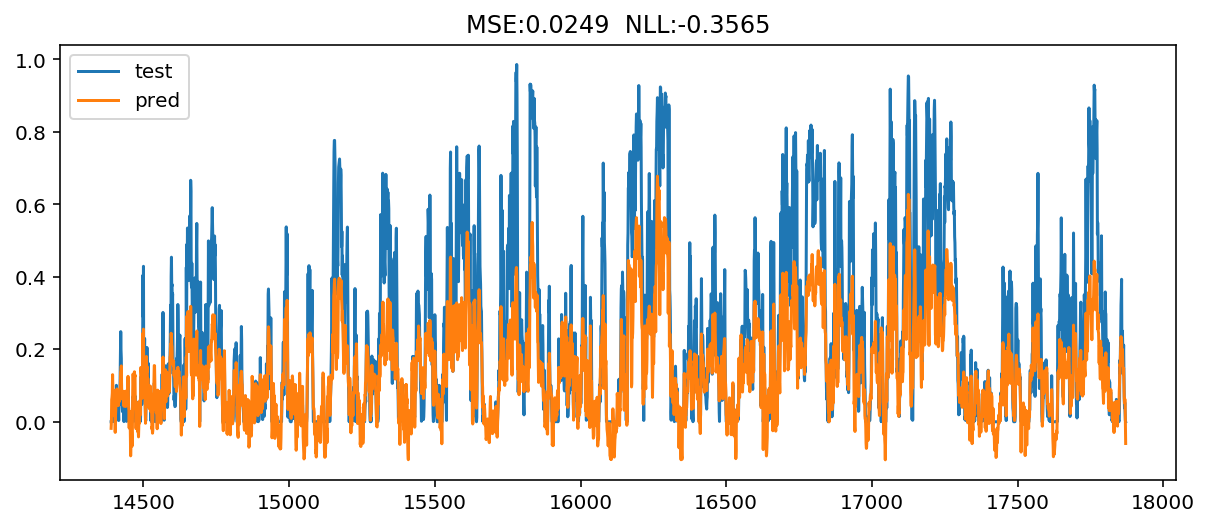

In [3]:
Y_pred = model_test(Base=default_linear_learner(alpha=0.1),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_linear_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## default_tree_learner

NGBRegressor(Base=DecisionTreeRegressor(criterion='friedman_mse', max_depth=6,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=1000, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=200) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 200] loss=-0.2959 val_loss=0.0000 scale=0.1250 norm=0.0570
[iter 400] loss=-0.3028 val_loss=0.000

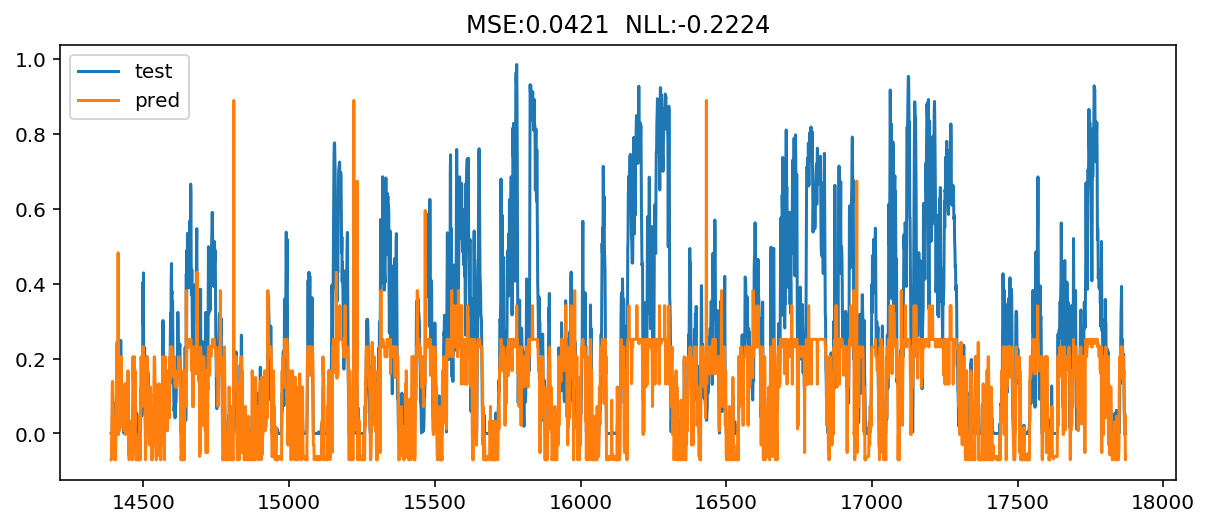

In [4]:
Y_pred = model_test(Base=default_tree_learner(depth=6),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=1000, verbose_eval=200,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'default_tree_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## lasso_learner

NGBRegressor(Base=Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                        max_iter=1000, normalize=False, positive=False,
                        precompute=False, random_state=None, selection='cyclic',
                        tol=0.0001, warm_start=False),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.CRPS'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.1430 val_loss=0.0000 scale=0.2500 norm=0.6104
[iter 100] loss=0.0993 val_loss=0.0000 scale=0.0156 norm=0.0492
[iter 200] loss=0.0975 val_loss=0.0000 scale=0.0039 norm=0.0128
[iter 300] loss=0.0974 val_loss=0.0000 scale=0.0010 norm=0.0032
[iter 400] loss=0.0974 val_loss=0.0000 scale=0.0002 norm=0.0008

Test MSE 0.021722399857870455
Test NLL -0.37214758378314444


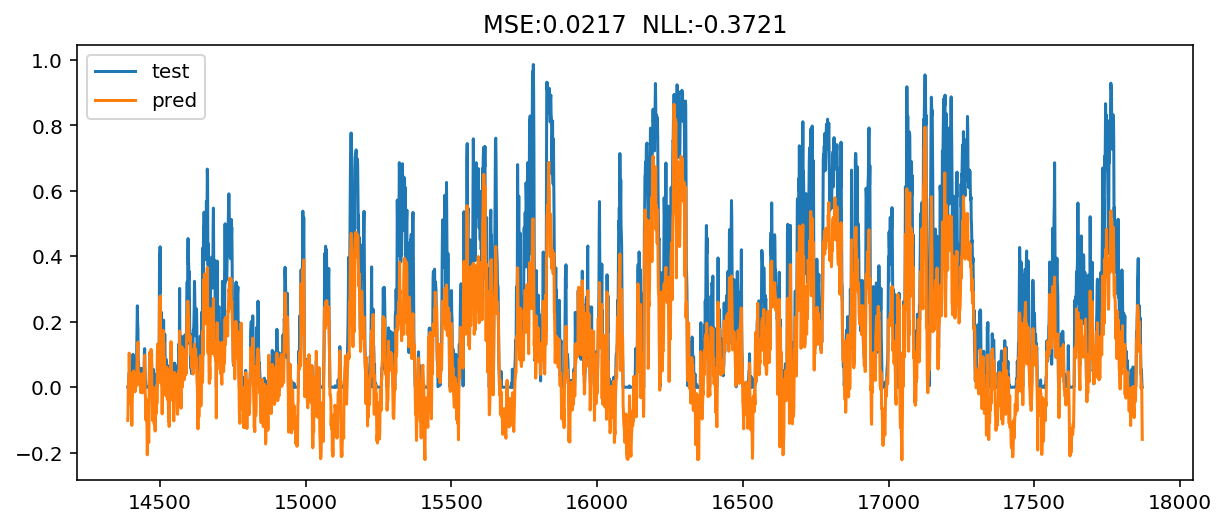

In [16]:
Y_pred = model_test(Base=lasso_learner(alpha=0.01),
           n_estimators=500, verbose_eval=100, Score=CRPS,
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'lasso_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## linear_svr_learner

NGBRegressor(Base=LinearSVR(C=0.05, dual=True, epsilon=0.0, fit_intercept=True,
                            intercept_scaling=1.0, loss='epsilon_insensitive',
                            max_iter=1000, random_state=None, tol=0.0001,
                            verbose=0),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=100) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 100] loss=-0.0999 val_loss=0.0000 scale=0.2500 norm=0.1589
[iter 200] loss=-0.1446 val_loss=0.0000 scale=0.0625 norm=0.0398
[iter 300] loss=-0.1502 val_loss=0.0000 scale=0.0156 norm=0.0098
[iter 400] loss=-0.1506 val_loss=0.0000 scale=0.0039 norm=0.0024

Test MSE 0.019636039860465172
Test NLL -0.380005010215928


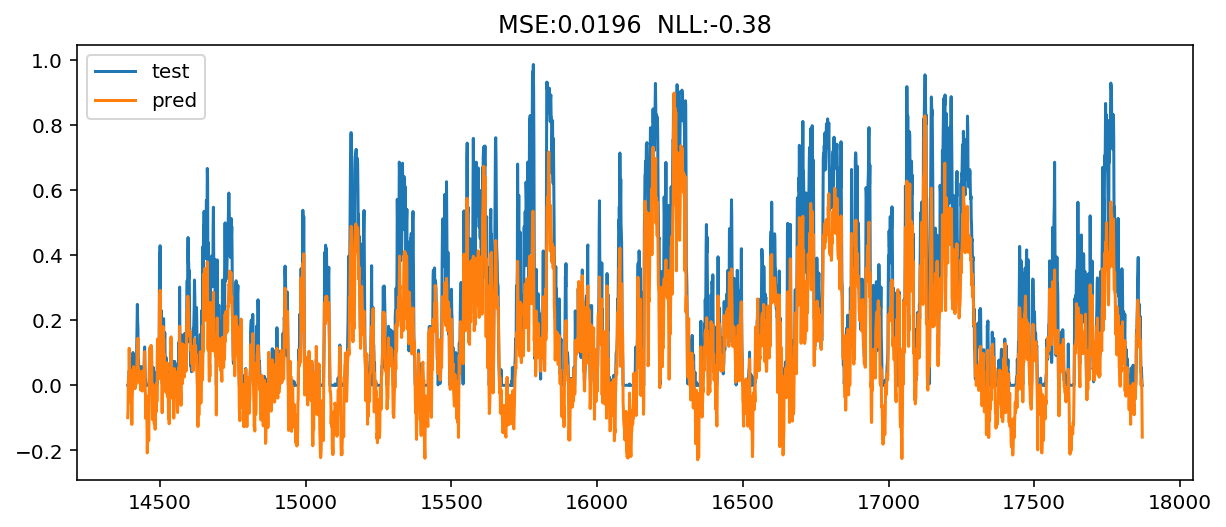

In [5]:
Y_pred = model_test(Base=linear_svr_learner(epsilon=0.0, 
                                   C=0.05, 
                                   max_iter=10000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=100,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## kernel_ridge_learner

NGBRegressor(Base=KernelRidge(alpha=0.5, coef0=1, degree=3, gamma=None,
                              kernel='poly', kernel_params=None),
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5407
[iter 10] loss=-0.0825 val_loss=0.0000 scale=1.0000 norm=0.4712
[iter 20] loss=-0.1351 val_loss=0.0000 scale=0.5000 norm=0.2337
[iter 30] loss=-0.1698 val_loss=0.0000 scale=0.5000 norm=0.2361
[iter 40] loss=-0.2013 val_loss=0.0000 scale=0.5000 norm=0.2403
[iter 50] loss=-0.2258 val_loss=0.0000 scale=0.2500 norm=0.1223
[iter 60] loss=-0.2392 val_loss=0.0000 scale=0.2500 norm=0.1236
[iter 70] loss=-0.2516 val_loss=0.0000 scale=0.2500 norm=0.1248
[iter 80] loss=-0.2630 val_loss=0.0000 scale=0.2500 norm=0.1260
[iter 90] loss=-0.2733 val_lo

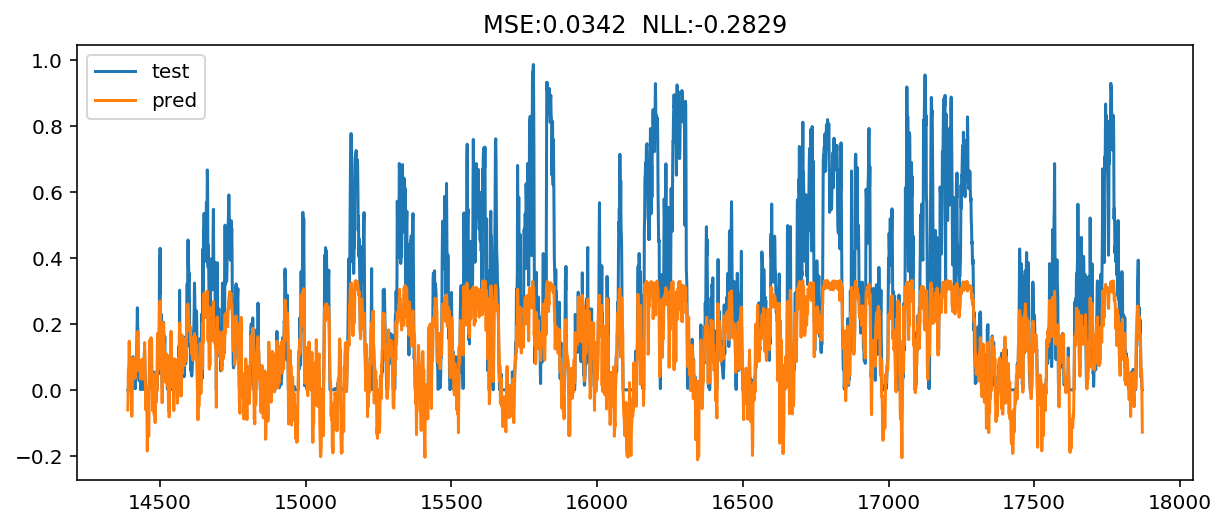

In [6]:
Y_pred = model_test(Base=kernel_ridge_learner(alpha=0.5, 
                                    kernel="poly",
                                    degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_ridge_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_Ridge_learner object at 0x1a1b9a2c88>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5407
[iter 10] loss=-0.0832 val_loss=0.0000 scale=0.5000 norm=0.2338
[iter 20] loss=-0.1265 val_loss=0.0000 scale=0.5000 norm=0.2304
[iter 30] loss=-0.1636 val_loss=0.0000 scale=0.5000 norm=0.2309
[iter 40] loss=-0.1968 val_loss=0.0000 scale=0.5000 norm=0.2337
[iter 50] loss=-0.2264 val_loss=0.0000 scale=0.2500 norm=0.1189
[iter 60] loss=-0.2401 val_loss=0.0000 scale=0.2500 norm=0.1199
[iter 70] loss=-0.2530 val_loss=0.0000 scale=0.2500 norm=0.1210
[iter 80] loss=-0.2648 val_loss=0.0000 scale=0.2500 norm=0.1220
[iter 90] loss=-0.2757 val_loss=0.0000 scale=0.2500 norm=0.1229
[iter 100] loss=-0.2

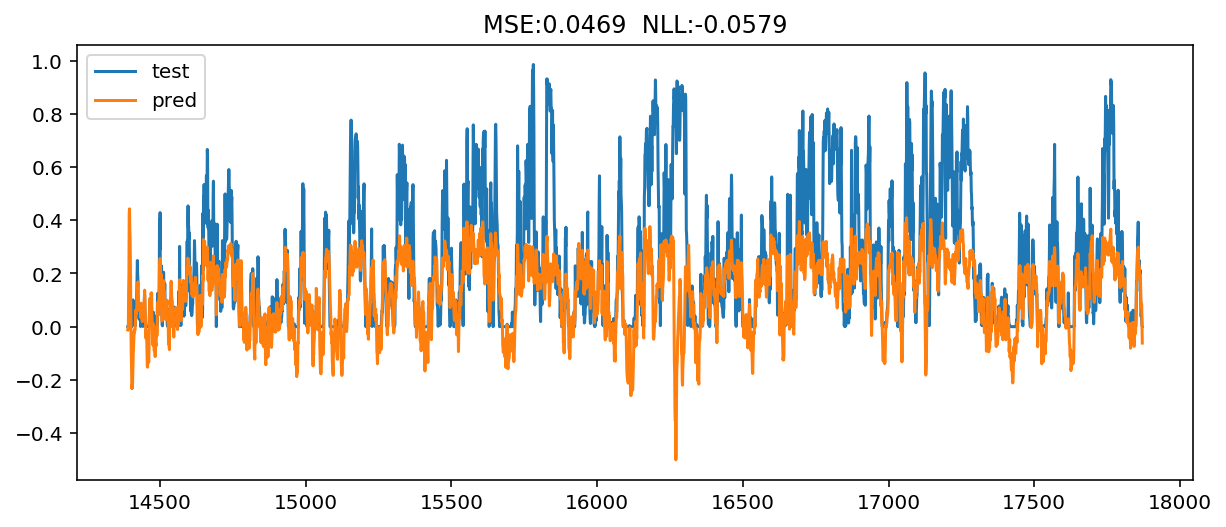

In [7]:
Y_pred = model_test(Base=esn_ridge_learner(n_readout=1000,
                                  n_components=100,
                                  alpha=0.01),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_kernel_ridge_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_kernel_ridge_learner object at 0x1a1b9a6e80>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=5) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=1.0000 norm=0.5407
[iter 5] loss=-0.0264 val_loss=0.0000 scale=1.0000 norm=0.4984
[iter 10] loss=-0.0683 val_loss=0.0000 scale=0.5000 norm=0.2421
[iter 15] loss=-0.0939 val_loss=0.0000 scale=0.5000 norm=0.2396
[iter 20] loss=-0.1173 val_loss=0.0000 scale=0.5000 norm=0.2384
[iter 25] loss=-0.1390 val_loss=0.0000 scale=0.5000 norm=0.2381
[iter 30] loss=-0.1593 val_loss=0.0000 scale=0.5000 norm=0.2387
[iter 35] loss=-0.1783 val_loss=0.0000 scale=0.5000 norm=0.2399
[iter 40] loss=-0.1961 val_loss=0.0000 scale=0.5000 norm=0.2415
[iter 45] loss=-0.2129 val_loss=0.0000 scale=0.5000 norm=0.2433
[iter 50] loss=

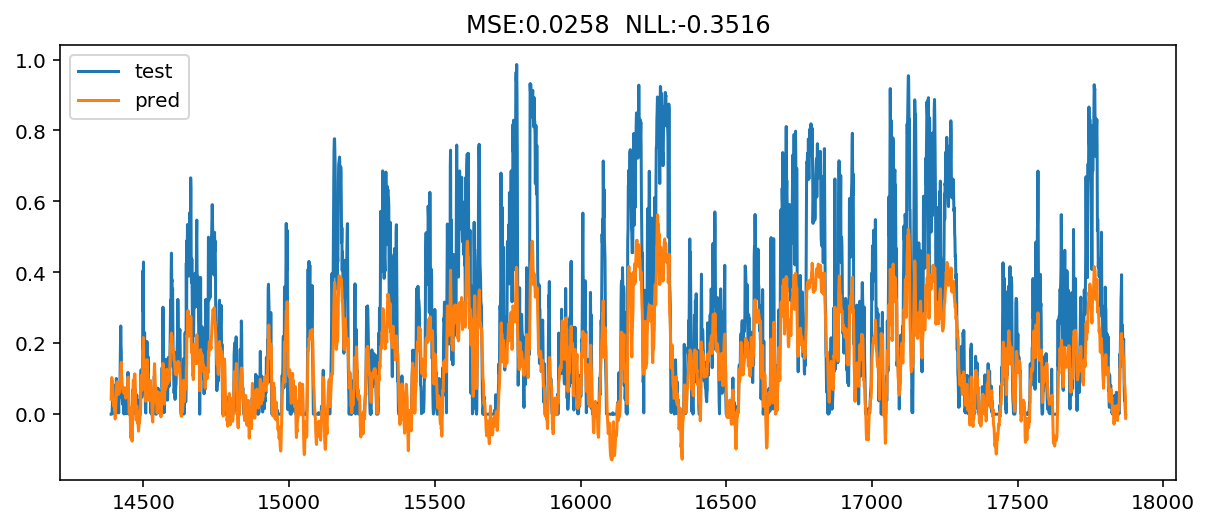

In [8]:
Y_pred = model_test(Base=esn_kernel_ridge_learner(n_readout=1000,
                                         n_components=100,
                                         alpha=1, 
                                         kernel='poly',
                                         degree=3),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=5,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_kernel_ridge_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

## esn_linear_svr_learner

NGBRegressor(Base=<ngboost.esn_learners.ESN_linear_svr_learner object at 0x1a1bd6b940>,
             Dist=<class 'ngboost.distns.normal.Normal'>,
             Score=<class 'ngboost.scores.MLE'>, learning_rate=0.01,
             minibatch_frac=1.0, n_estimators=500, natural_gradient=True,
             tol=0.0001, verbose=True, verbose_eval=10) 

[iter 0] loss=0.0535 val_loss=0.0000 scale=0.5000 norm=0.2703
[iter 10] loss=0.0406 val_loss=0.0000 scale=0.5000 norm=0.2762
[iter 20] loss=0.0248 val_loss=0.0000 scale=0.5000 norm=0.2822
[iter 30] loss=0.0044 val_loss=0.0000 scale=0.5000 norm=0.2877
[iter 40] loss=-0.0182 val_loss=0.0000 scale=0.5000 norm=0.2933
[iter 50] loss=-0.0443 val_loss=0.0000 scale=0.5000 norm=0.2983
[iter 60] loss=-0.0701 val_loss=0.0000 scale=0.5000 norm=0.3027
[iter 70] loss=-0.0850 val_loss=0.0000 scale=0.2500 norm=0.1525
[iter 80] loss=-0.0982 val_loss=0.0000 scale=0.2500 norm=0.1535
[iter 90] loss=-0.1106 val_loss=0.0000 scale=0.2500 norm=0.1544
[iter 100] loss=-0

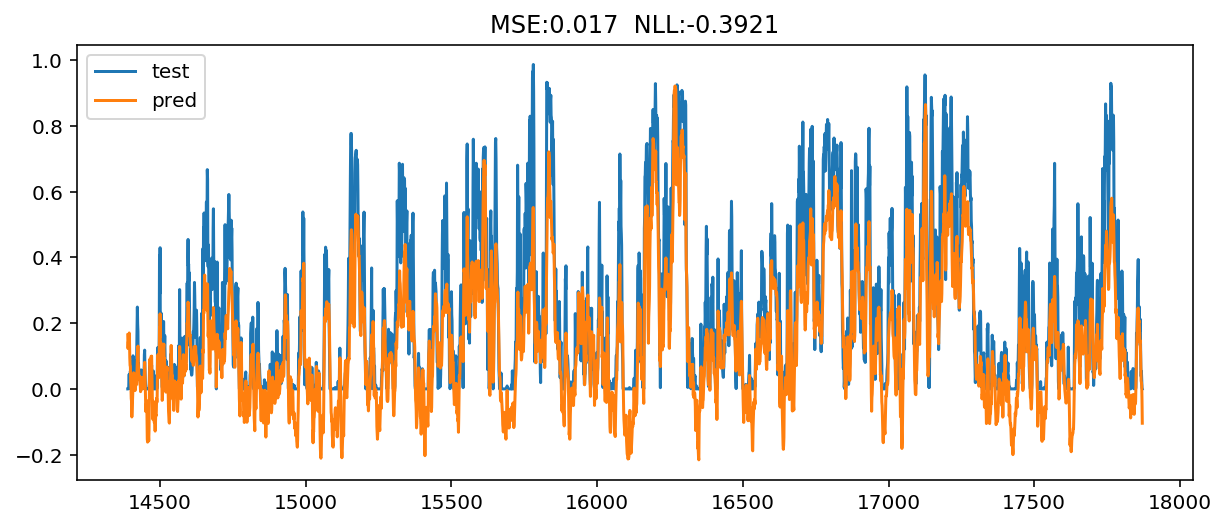

In [9]:
Y_pred = model_test(Base=esn_linear_svr_learner(n_readout=1000,
                                         n_components=100,
                                         epsilon=0.0,
                                         C=0.02,
                                         max_iter=1000),
           X_train=X_train, X_test=X_test,
           Y_train=Y_train, Y_test=Y_test,
          n_estimators=500, verbose_eval=10,
          plot_predict=True, return_y_pred=True)
Y_pred.name = 'esn_linear_svr_learner'
Pred_df = pd.concat([Pred_df, Y_pred], axis=1)
del Y_pred

In [17]:
Pred_df.to_csv('/Users/apple/Documents/ML_Project/ML - 2.1/result/'+transform+'.csv')